# Chapter 11 Assignment: Neural nets (NN)

### Read Chapter 11 of DMBA and review relevant resources in Module - Chapter 11 Neural Nets before starting this assignment. Provide your answers to all problems below, save this Jupyter notebook (.ipynb file), and then submit it along with your Excel worksheet in Canvas by the due date.

In [70]:
# Import required packages for this chapter
from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor

import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, liftChart, gainsChart

%matplotlib inline

In [71]:
# Working directory:
# If you keep your data in a different folder, replace the argument of the `Path`
# DATA = Path('/Users/user/data/dmba/')
DATA = Path('C:\\Users\\tanve\\Documents\\206\\dmba\\')
# and then load data using 
# pd.read_csv(DATA / ‘filename.csv’)

# 1: Credit Card Use.

Consider the hypothetical bank data in Table 11.7 of the DMBA textbook on consumers’ use of credit card credit facilities. Create a small worksheet in Excel to illustrate one pass through a simple neural network (Randomly generate initial weight values)

_Years: number of years the customer has been with the bank_

_Salary: customer’s salary (in thousands of dollars)_

_Used Credit:<br> 
1 = customer has left an unpaid credit card balance at the end of at least one month in the prior year, <br>
0 = balance was paid off at the end of each month_
<p>
Upload your Excel worksheet via canvas submission.

# 2: Neural Net Evolution. 

A neural net typically starts out with random coeffcients; hence, it produces essentially random predictions when presented with its first case. What is the key ingredient by which the net evolves to produce a more accurate prediction?

Error and learning rate work together to modify weights and bias values as the midel runs through its epocs.  

# 3: Direct Mailing to Airline Customers.

East-West Airlines has entered into a partnership with the wireless phone company Telcon to sell the latter’s service via direct mail. The file _EastWestAirlinesNN.csv_ contains a subset of a data sample of who has already received a test oﬀer. About 13% accepted.

You are asked to develop a model to classify East–West customers as to whether they purchase a wireless phone service contract (outcome variable Phone_Sale). This model will be used to classify additional customers.

Review the <a href="https://www.thecasesolutions.com/project-data-mining-on-east-west-airlines-65598">Data Dictionary</a> first to understand the data.

You will need <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html?highlight=mlpclassifier#sklearn.neural_network.MLPClassifier">sklearn.neural_network.MLPClassifier</a> so review this documentation first. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>


In [72]:
# load the data
airline_df = pd.read_csv(DATA / 'EastWestAirlinesNN.csv')
airline_df = airline_df.dropna()
airline_df

,ID#,Topflight,Balance,Qual_miles,cc1_miles?,cc2_miles?,cc3_miles?,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Online_12,Email,Club_member,Any_cc_miles_12mo,Phone_sale
0,1.0,0.0,28143.0,0.0,0.0,1.0,0.0,174.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,19244.0,0.0,0.0,0.0,0.0,215.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,41354.0,0.0,1.0,0.0,0.0,4123.0,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4.0,0.0,14776.0,0.0,0.0,0.0,0.0,500.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,5.0,1.0,97752.0,0.0,1.0,0.0,0.0,43300.0,26.0,2077.0,4.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,5004.0,0.0,227.0,0.0,1.0,0.0,0.0,227.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4981,5005.0,0.0,3620.0,1435.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4982,5006.0,0.0,10013.0,2436.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4983,5007.0,0.0,4832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


__a.__ Run a neural net model on these data, using a single hidden layer with five nodes. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer. Remember to first convert categorical variables into dummies and scale numerical predictor variables to a 0–1 (use the scikit-learn transformer <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">MinMaxScaler() </a> (also see Chapter 2.4 of DMBA).<p>
Use the training data to learn the transformation (see Table 7.2 in DMBA) rescaling the entire data (numerical variables only) to [0, 1] via "clip=True" in: <p>
scaleInput = MinMaxScaler(feature_range=(0, 1), clip=True)<p>
clip=True to clip transformed values of held-out data to provided feature range<p>
Do not scale binary dummy variables. Create a decile-wise lift chart for the training and validation sets. Interpret the meaning (in business terms) of the leftmost bar of the validation decile-wise lift chart.

In [73]:
nonDummy = ['Balance', 'Qual_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_trans_12']
airline_df = airline_df.drop(columns='ID#')
outcome = 'Phone_sale'
predictors = airline_df.drop(columns=outcome).columns

In [74]:
X = airline_df[predictors]
y = airline_df[outcome]

In [75]:
minMax = MinMaxScaler(feature_range=(0, 1), clip=True)
X_scaled = minMax.fit_transform(X[nonDummy])
np.append(X_scaled, X.drop(columns=nonDummy))
X_scaled

array([[0.01650773, 0.        , 0.00065988, 0.01136364, 0.        ],
       [0.01128788, 0.        , 0.00081537, 0.02272727, 0.        ],
       [0.02425685, 0.        , 0.01563608, 0.04545455, 0.        ],
       ...,
       [0.00587329, 0.21851453, 0.        , 0.        , 0.        ],
       [0.00283429, 0.        , 0.        , 0.        , 0.        ],
       [0.00029328, 0.        , 0.        , 0.        , 0.        ]])

In [76]:
train_X, temp_X, train_y, temp_y = train_test_split(X_scaled, y, train_size=0.5, random_state= 1)
test_X, valid_X, test_y, valid_y = train_test_split(temp_X, temp_y, train_size=0.6, random_state= 1)

In [77]:
clf = MLPClassifier(hidden_layer_sizes=(5), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y)
#clf.predict(valid_X)

MLPClassifier(activation='logistic', hidden_layer_sizes=5, random_state=1,
              solver='lbfgs')

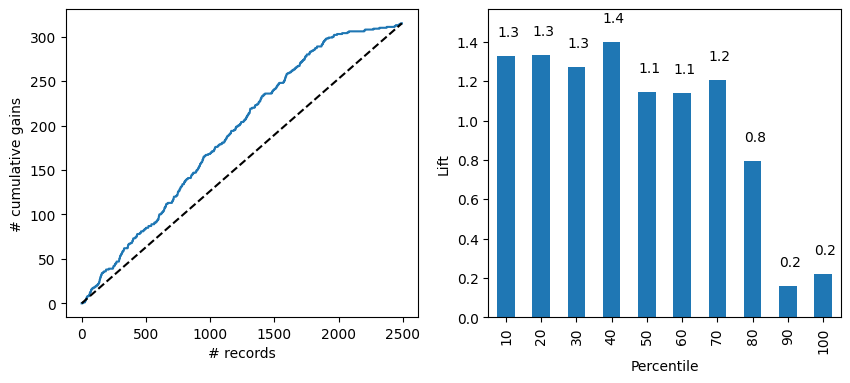

In [78]:
proba = clf.predict_proba(train_X)
result = pd.DataFrame({'actual': train_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': clf.predict(train_X) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.show()

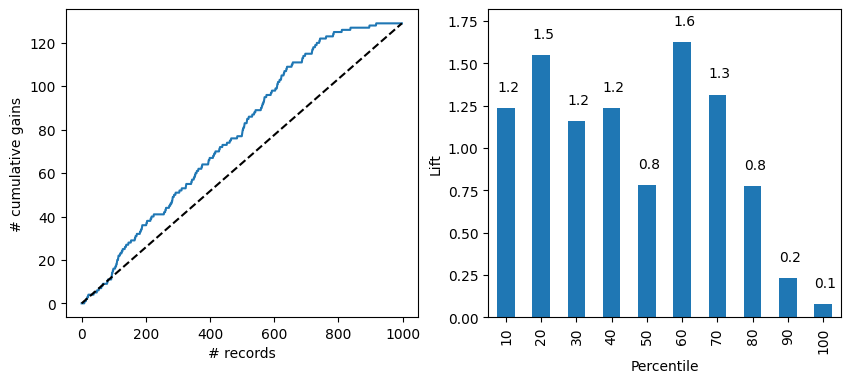

In [79]:
proba = clf.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': clf.predict(valid_X) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.show()

c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


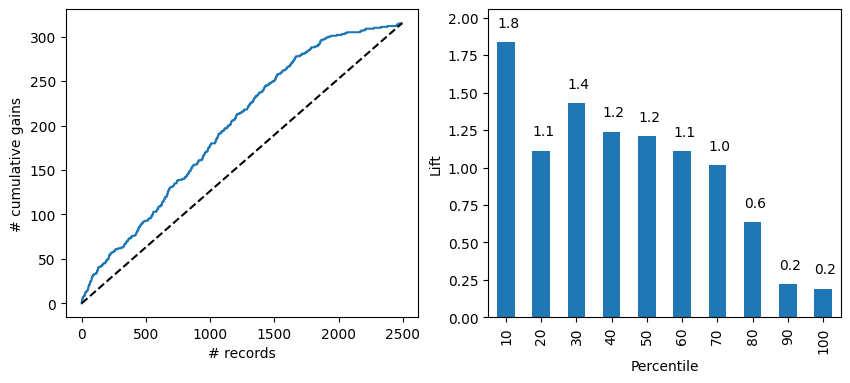

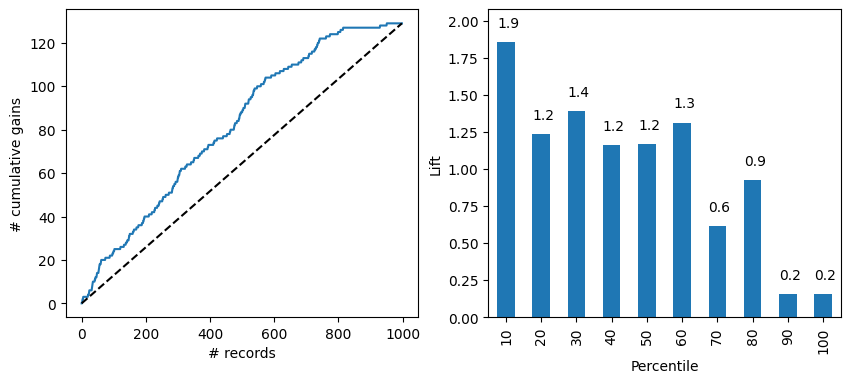

In [80]:
clf = MLPClassifier(hidden_layer_sizes=(5), activation='relu', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y)
proba = clf.predict_proba(train_X)
result = pd.DataFrame({'actual': train_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': clf.predict(train_X) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.show()
proba = clf.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': clf.predict(valid_X) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.show()

__b.__ Comment on the diﬀerence between the training and validation lift charts.

The trainin lift chart is more evenly distributed across the different deciles, whereas the validation set has most of its lift in the 20 and 60 deciles. 

__c.__ Run a second neural net model on the data, this time setting the number of hidden nodes to 1. Comment now on the diﬀerence between this model and the model you ran earlier, and how overftting might have aﬀected results.

In [81]:
clf = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=1, random_state=1,
              solver='lbfgs')

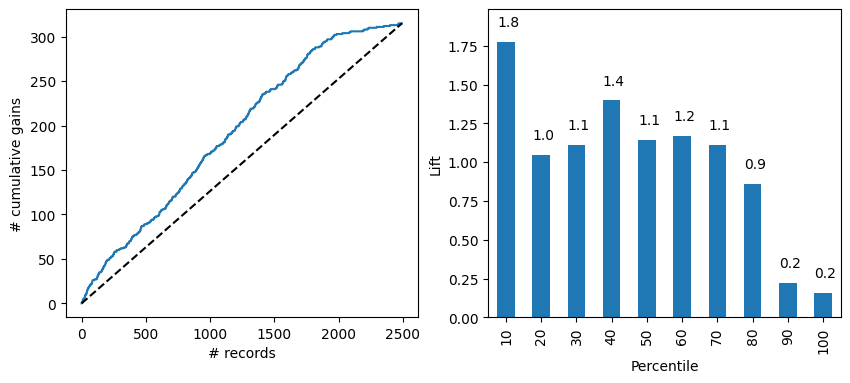

In [82]:
proba = clf.predict_proba(train_X)
result = pd.DataFrame({'actual': train_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': clf.predict(train_X) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.show()

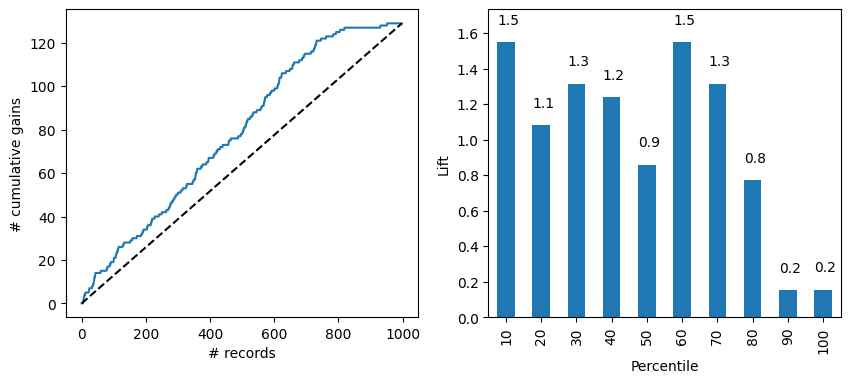

In [83]:
proba = clf.predict_proba(valid_X)
result = pd.DataFrame({'actual': valid_y, 
                       'p(0)': [p[0] for p in proba],
                       'p(1)': [p[1] for p in proba],
                       'predicted': clf.predict(valid_X) })
df = result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title=False)
plt.show()

The traing set now expereinces most of its lift in the first decile while the validation set has been affected much less but still has a larger proportion in its first decile. This could be that the training set was overfit so that it appears that the model has increased is predictive power, but only becasue the net is now more "hard coded" for the dataset. There were not as many nodes to be adjusted to more finly tune for more variables. 

__d.__ What sort of information, if any, is provided about the eﬀects of the various variables?

Based on the lift charts for a net using five nodes vs one, we can say that the variables help tune the model to a higher degree. In the net with only one node the distribution of lift was not was drastically affected as the net with five nodes. There was a larger differnece in the lift across the deifferent deciles in the net with 5 nodes as obserevd in (b) than (c)

__e.__ Use GridSearchCV() to search for the number of nodes with the best score in a single layer of hidden nodes. 

In [84]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8735953835381608
Best parameters:  {'hidden_layer_sizes': 1}


# 4: Car Sales.

Consider the data on used cars (_ToyotaCorolla.csv_) with 1436 records and details on 38 attributes, including Price, Age, KM, HP, and other specifcations. The goal is to predict the price of a used Toyota Corolla based on its specifcations. You will need <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html">sklearn.neural_network.MLPRegressor</a> so review this documentation first. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>
__a.__ Fit a neural network model to the data. Use a single hidden layer with 2 nodes. Use predictors Age_08_04, KM, Fuel_Type, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, and Tow_Bar. Use the scikit-learn transformer _MinMaxScaler()_ to scale numerical variables to the range [0, 1]. Use separate transformer for the input and output data. Try both ‘logistic’ and ‘relu’ activation functions for the hidden layer.<p>
<pre>    
# Use the training data to learn the transformation (see Table 7.2 in DMBA) rescaling the entire data (numerical variables only) to [0, 1]. 
scaleInput = MinMaxScaler(feature_range=(0, 1), clip=True)
scaleOutput = MinMaxScaler(feature_range=(0, 1), clip=True)
# clip=True to clip transformed values of held-out data to provided feature range
# Do not scale binary dummy variables.
</pre>
<p>    
To create the dummy variables, use the pandas function pd.get_dummies(). Record the RMS error for the training data and the validation data. Repeat the process, changing the number of hidden layers and nodes to {single layer with 5 nodes}, {two layers, 5 nodes in each layer}.
<p>
    
<pre>
From the textbook: "Using the Output for Prediction and Classification - When the neural network is used for predicting a numerical outcome variable, MLPRegressor() uses an identity activation function (i.e., no activation function). Both predictor and outcome variables should be scaled to a [0, 1] interval before training the network. The output will therefore also be on a [0, 1] scale. To transform the prediction back to the original y units, which were in the range [a, b], we multiply the network output by (b − a) and add a."
To transform the prediction back to the original y units, use <a href="https://stackoverflow.com/questions/59771061/using-inverse-transform-minmaxscaler-from-scikit-learn-to-force-a-dataframe-be-i">inverse_transform</a>.

Example:

#Create new data
new_data = pd.DataFrame(np.array([[8,20],[11,2],[5,3]]))
new_data

# Create a Scaler for the new data
scaler_new_data = MinMaxScaler() 
# Trasform new data in the [0-1] range
scaled_new_data = scaler_new_data.fit_transform(new_data)
scaled_new_data

# Inverse transform new data from [0-1] to [min, max] of data
inver_new_data = scaler_new_data.inverse_transform(scaled_new_data)
inver_new_data

</pre>



In [90]:
# load the data
car_df = pd.read_csv(DATA / 'ToyotaCorolla.csv')
car_df = car_df.dropna()
predictors = ['Age_08_04','KM',
       'Fuel_Type', 'HP', 'Automatic','Doors',
       'Quarterly_Tax', 'Mfr_Guarantee',
       'Guarantee_Period',
       'Airco', 'Automatic_airco', 'CD_Player',
       'Powered_Windows', 'Sport_Model','Tow_Bar']
outcome = 'Price'

In [91]:
car_df[predictors].dtypes

Age_08_04            int64
KM                   int64
Fuel_Type           object
HP                   int64
Automatic            int64
Doors                int64
Quarterly_Tax        int64
Mfr_Guarantee        int64
Guarantee_Period     int64
Airco                int64
Automatic_airco      int64
CD_Player            int64
Powered_Windows      int64
Sport_Model          int64
Tow_Bar              int64
dtype: object

In [92]:
car_df["Fuel_Type"] = car_df['Fuel_Type'].astype('category')
nonDummy = car_df[predictors].drop(columns='Fuel_Type').columns
X = pd.get_dummies(car_df[predictors], prefix_sep='_', drop_first=True)
y = car_df[outcome]
#minMax = MinMaxScaler(feature_range=(0, 1), clip=True)
X_scaled = minMax.fit_transform(X[nonDummy])
np.append(X_scaled, X.drop(columns=nonDummy))
X_scaled

In [94]:
train_X, temp_X, train_y, temp_y = train_test_split(X_scaled, y, train_size=0.5, random_state= 1)
test_X, valid_X, test_y, valid_y = train_test_split(temp_X, temp_y, train_size=0.6, random_state= 1)

array([[0.27848101, 0.19335471, 0.17073171, ..., 1.        , 0.        ,
        0.        ],
       [0.27848101, 0.30014938, 0.17073171, ..., 0.        , 0.        ,
        0.        ],
       [0.29113924, 0.1716468 , 0.17073171, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.88607595, 0.07002086, 0.13821138, ..., 0.        , 0.        ,
        0.        ],
       [0.87341772, 0.06960934, 0.13821138, ..., 0.        , 0.        ,
        0.        ],
       [0.94936709, 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [96]:
clf = MLPClassifier(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(train_X, train_y)
clfr = MLPClassifier(hidden_layer_sizes=(2), activation='relu', solver='lbfgs', random_state=1)
clfr.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=2, random_state=1, solver='lbfgs')

In [97]:
classificationSummary(valid_y, clf.predict(valid_X))
classificationSummary(valid_y, clfr.predict(valid_X))

Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0


In [99]:
for i in range(1,10):
    clf = MLPClassifier(hidden_layer_sizes=(i), activation='logistic', solver='lbfgs', random_state=1, max_iter= 500)
    clf.fit(train_X, train_y)
    print(i)
    classificationSummary(valid_y, clf.predict(valid_X))

1
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
2
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
3
Confusion Matrix (Accuracy 0.8697)

       Prediction
Actual   0   1
     0 868   1
     1 129   0
4
Confusion Matrix (Accuracy 0.8687)

       Prediction
Actual   0   1
     0 867   2
     1 129   0
5
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
6
Confusion Matrix (Accuracy 0.8687)

       Prediction
Actual   0   1
     0 867   2
     1 129   0
7
Confusion Matrix (Accuracy 0.8697)

       Prediction
Actual   0   1
     0 868   1
     1 129   0


c:\Program Files\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


8
Confusion Matrix (Accuracy 0.8697)

       Prediction
Actual   0   1
     0 868   1
     1 129   0
9
Confusion Matrix (Accuracy 0.8697)

       Prediction
Actual   0   1
     0 868   1
     1 129   0


In [113]:
for i in range(1,20):
    clf = MLPClassifier(hidden_layer_sizes=(list(range(1,i+1))), activation='relu', solver='lbfgs', random_state=1, max_iter= 500)
    clf.fit(train_X, train_y)
    print(i)
    classificationSummary(valid_y, clf.predict(valid_X))

1
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
2
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
3
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
4
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
5
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
6
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
7
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
8
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
9
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
     1 129   0
10
Confusion Matrix (Accuracy 0.8707)

       Prediction
Actual   0   1
     0 869   0
    

i. What happens to the RMS error for the training data as the number of layers and nodes increases? 

In [108]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
gridSearch.cv_results_

{'mean_fit_time': array([0.04480019, 0.1027987 , 0.1226017 , 0.34800282, 0.30480442,
        1.29461284, 0.61840339, 1.81181593, 2.17162218, 1.77141743,
        1.84581728, 3.73303857, 3.15282907, 3.3562294 , 2.59002266,
        4.44544144, 4.61464386, 4.25664344, 4.18765121]),
 'std_fit_time': array([0.01218762, 0.03938541, 0.02316624, 0.08904887, 0.21333661,
        0.6125215 , 0.23702744, 0.71572269, 0.87851307, 0.68000637,
        0.74142857, 0.32047256, 1.38125544, 1.03064399, 1.18941165,
        0.13466114, 0.28801403, 0.29779501, 0.2551581 ]),
 'mean_score_time': array([0.00160065, 0.00260749, 0.00200095, 0.00200191, 0.00199995,
        0.00180011, 0.00399976, 0.00160351, 0.00179906, 0.00180192,
        0.00199952, 0.00199695, 0.00199976, 0.00179901, 0.00219989,
        0.00319924, 0.00199852, 0.00380087, 0.00119047]),
 'std_score_time': array([4.87960434e-04, 1.35758681e-03, 6.19814942e-06, 6.25838552e-06,
        1.54791325e-03, 3.96044404e-04, 3.63513548e-03, 4.86892013e-04,


Acording to the gridsearch results, the RMS decreases as the number of nodes increase. According to the for loop and classification of the CLF classifier that increased in number of nodes and number of hidden layers, there is no observable chnage in the accuracy with the increase. 

ii. What happens to the RMS error for the validation data?

In [110]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(valid_X, valid_y)
gridSearch.cv_results_

{'mean_fit_time': array([0.02940316, 0.12500243, 0.15280228, 0.50359974, 0.4478045 ,
        1.14060926, 0.79880061, 1.69001627, 1.50361323, 1.55601187,
        1.5410141 , 1.79041405, 1.78921494, 1.68961468, 1.88161654,
        2.01221914, 2.13962002, 2.25641966, 1.92003589]),
 'std_fit_time': array([0.00484025, 0.06200907, 0.04374199, 0.26127897, 0.35454675,
        0.24446932, 0.47520624, 0.18069223, 0.32427118, 0.16745546,
        0.36152758, 0.12595777, 0.13585809, 0.13476347, 0.16207268,
        0.17420652, 0.31690198, 0.14700694, 0.09026305]),
 'mean_score_time': array([0.0013979 , 0.00120001, 0.0018002 , 0.00140181, 0.00160074,
        0.00180254, 0.00260382, 0.00279894, 0.00139942, 0.00160012,
        0.00120134, 0.00160165, 0.00160294, 0.00120025, 0.00160074,
        0.00179992, 0.00180192, 0.00159979, 0.00119472]),
 'std_score_time': array([0.00048897, 0.00040279, 0.00159972, 0.00049064, 0.00048369,
        0.00075371, 0.00079903, 0.00222852, 0.00048977, 0.00048899,
        

The validation data appears to be increase is mean square error as the number of nodes increase. 

iii. Comment on the appropriate number of layers and nodes for this application

Based on the accuracy scores, we can acheive the same accuracy with 1 hidden layer with 1 node than 19 hidden layers with n+1 nodes on each subsequent layer. 


__b.__ Use GridSearchCV() to search for the number of nodes with the best score in a single layer of hidden nodes.

In [111]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)
gridSearch.cv_results_
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)

Best score:  0.8735953835381608
Best parameters:  {'hidden_layer_sizes': 1}
